# Visual Demo

This notebook demonstrates how to use MissMecha's visualization module to inspect missingness patterns in data.

We will:
- Visualize missing data matrices
- Explore nullity (missingness) correlation heatmaps
- Apply visualizations to both tabular and time series datasets

## Import Required Libraries

In [1]:
import pandas as pd
import numpy as np
from missmecha.visual import plot_missing_matrix, plot_missing_heatmap
from missmecha.generator import MissMechaGenerator

## Matrix Visualization (Simple Tabular Example)

We first create a small DataFrame and manually introduce missingness.

In [2]:
np.random.seed(42)

data = {
    'age': [25, 30, 28, 40, 22, 35, 32, 26, 27, 38],
    'income': [50000, 60000, 58000, 61000, 52000, 59000, 57000, 56000, 62000, 54000],
    'gender': ['M', 'F', 'M', 'F', 'F', 'M', 'F', 'M', 'F', 'F']
}

df = pd.DataFrame(data)

# Introduce MAR pattern (hide age when income > 58000)
df.loc[df['income'] > 58000, 'age'] = np.nan

df.head()

age  income gender
0  25.0   50000      M
1   NaN   60000      F
2  28.0   58000      M
3   NaN   61000      F
4  22.0   52000      F

### Binary Missingness Matrix

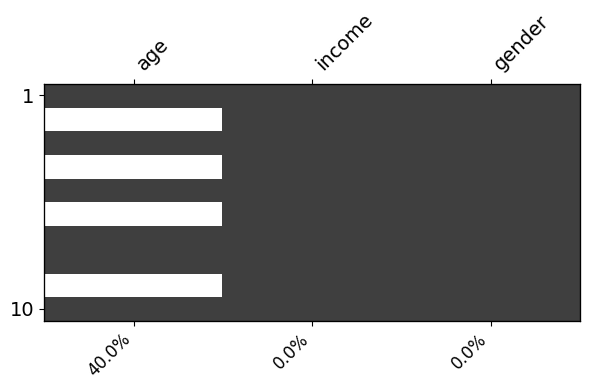

In [3]:
plot_missing_matrix(df, color=False)

- White = missing value
- Black = observed value
- Column-wise missing rates are annotated

### Value-Colored Missingness Matrix

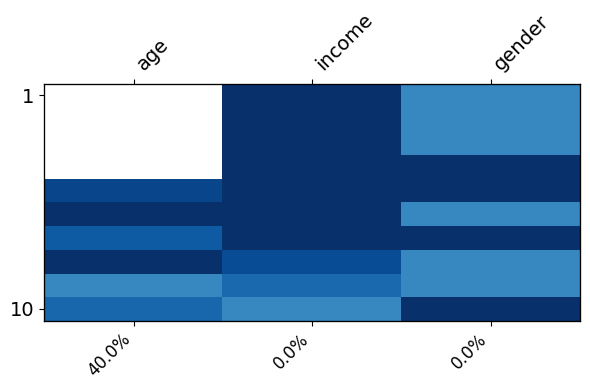

In [4]:
plot_missing_matrix(df, sort_by = "income")

This version colors by the magnitude of values, helping to identify patterns between missingness and feature values.

---

## Time Series Missingness Visualization

We now create a time-indexed dataset with artificial missingness.

In [5]:
# Create normal values
values = np.random.normal(loc=50, scale=10, size=(20, 10))

# Apply missingness via MissMechaGenerator
mecha = MissMechaGenerator()
X_missing = mecha.fit_transform(values)

df_ts = pd.DataFrame(X_missing, index=pd.date_range('1/1/2011', periods=20, freq='D').strftime('%Y-%m-%d'))

df_ts.head()

0          1          2          3          4          5  \
2011-01-01  54.967142  48.617357        NaN  65.230299  47.658466  47.658630   
2011-01-02  45.365823  45.342702  52.419623  30.867198  32.750822  44.377125   
2011-01-03  64.656488  47.742237  50.675282  35.752518  44.556173  51.109226   
2011-01-04  43.982934        NaN  49.865028  39.422891  58.225449  37.791564   
2011-01-05  57.384666  51.713683  48.843517  46.988963  35.214780  42.801558   

                    6          7          8          9  
2011-01-01  65.792128  57.674347  45.305256        NaN  
2011-01-02        NaN  53.142473  40.919759  35.876963  
2011-01-03  38.490064  53.756980        NaN  47.083063  
2011-01-04        NaN  30.403299  36.718140        NaN  
2011-01-05  45.393612  60.571222        NaN  32.369598

### Time Series Matrix Plot

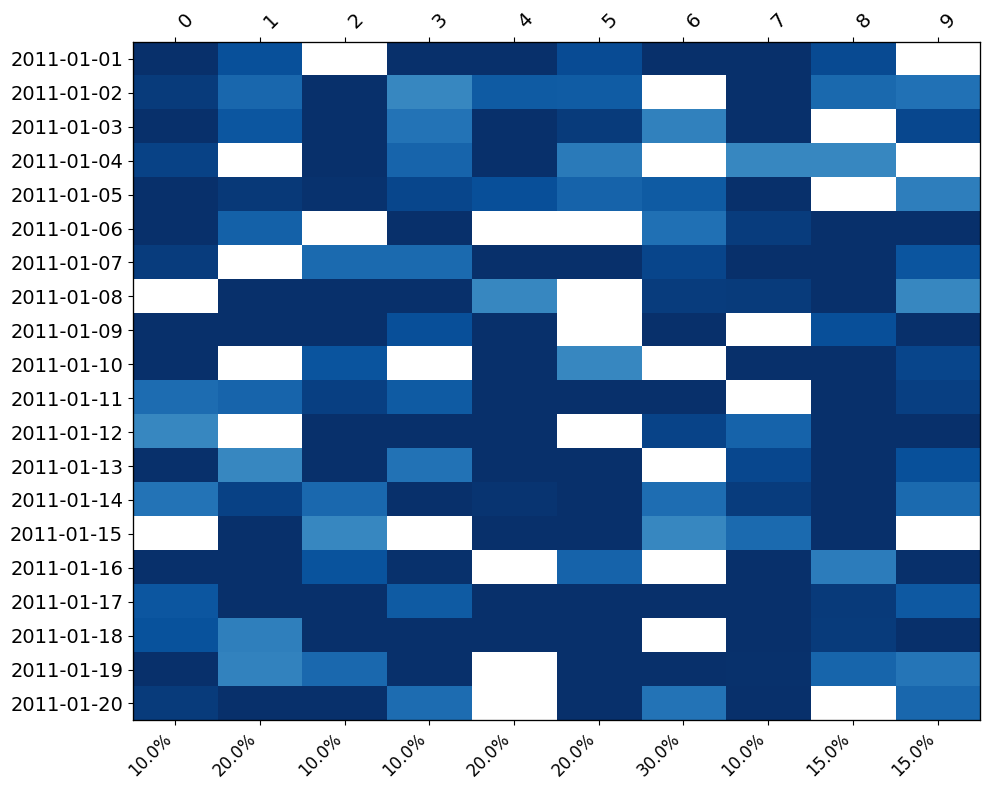

In [6]:
plot_missing_matrix(df_ts,ts = True,figsize=(10, 8))

Here only the first and last row indices are shown, designed for cleaner time series views.

---

## Nullity Correlation Heatmap

### Create Mixed Dataset

In [7]:
data_mixed = pd.DataFrame({
    "DATE": ["09/10/2016", "03/31/2016", "03/16/2016", "04/01/2016", np.nan, "04/03/2016"],
    "TIME": ["12:09:00", "22:10:00", "14:58:00", np.nan, "08:30:00", "19:00:00"],
    "BOROUGH": ["QUEENS", "BROOKLYN", "MANHATTAN", "QUEENS", "BRONX", np.nan],
    "ZIP CODE": ["11427", "11223", "10001", "11434", np.nan, "10010"],
    "LATITUDE": [40.724692, 40.598761, 40.712776, np.nan, 40.850000, 40.755000],
    "LONGITUDE": [-73.874245, -73.987843, -74.006058, -73.900000, -73.880000, np.nan],
    "VEHICLE TYPE": ["BICYCLE", "PASSENGER VEHICLE", "TAXI", "SUV", np.nan, "BICYCLE"]
})

data_mixed.head()

DATE      TIME    BOROUGH ZIP CODE   LATITUDE  LONGITUDE  \
0  09/10/2016  12:09:00     QUEENS    11427  40.724692 -73.874245   
1  03/31/2016  22:10:00   BROOKLYN    11223  40.598761 -73.987843   
2  03/16/2016  14:58:00  MANHATTAN    10001  40.712776 -74.006058   
3  04/01/2016       NaN     QUEENS    11434        NaN -73.900000   
4         NaN  08:30:00      BRONX      NaN  40.850000 -73.880000   

        VEHICLE TYPE  
0            BICYCLE  
1  PASSENGER VEHICLE  
2               TAXI  
3                SUV  
4                NaN

### Nullity Correlation Heatmap

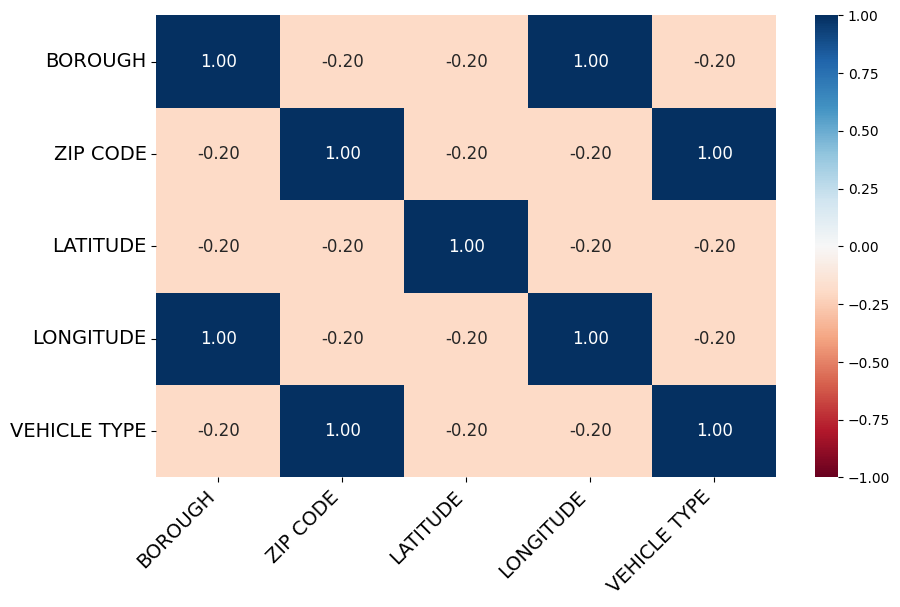

In [8]:
plot_missing_heatmap(data_mixed, method = "kendall", figsize=(10, 6))

This shows pairwise relationships between missingness patterns:
- Positive correlation: variables tend to be missing together
- Negative correlation: missingness in one variable implies observed values in another

---

## Key Takeaways
- `plot_missing_matrix()` visualizes missingness across datasets, in both binary and color-encoded modes.
- `plot_missing_heatmap()` reveals structural missingness dependencies.
- MissMecha visualization tools help diagnose missingness mechanisms at a glance.

---